##Loading the data into a pandas dataframe and selecting recent (1/2013-) incidents from Texas.

In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy as sp
import scipy.stats as stats
from datetime import datetime

In [2]:
strike_reports_civ = pd.read_table("STRIKE_REPORTS (2010-Current).csv", sep = ',', encoding = 'utf-8')
strike_reports_civ.shape

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/pandas/io/parsers.py:1170: DtypeWarning: Columns (4,5,6,7,8,11,12,14,16,17,23,29,31,35,36,66,67,68,69,70,73,76,86) have mixed types. Specify dtype option on import or set low_memory=False.
  data = self._reader.read(nrows)


(57415, 94)

In [3]:
strike_reports_civ = strike_reports_civ[strike_reports_civ.INCIDENT_YEAR >= 2013]
strike_reports_civ = strike_reports_civ[strike_reports_civ.STATE == "TX"]
strike_reports_civ.shape

(2622, 94)

In [4]:
strike_reports_civ.head()

,INDEX_NR,OPID,OPERATOR,ATYPE,AMA,AMO,EMA,EMO,AC_CLASS,AC_MASS,...,REPORTED_NAME,REPORTED_TITLE,REPORTED_DATE,SOURCE,PERSON,NR_INJURIES,NR_FATALITIES,LUPDATE,TRANSFER,INDICATED_DAMAGE
29716,331984,ASH,MESA AIRLINES,CRJ700,188,16,22,04,A,4,...,Deleted,Deleted,NaN,FAA Form 5200-7-E,Pilot,NaN,NaN,2013-05-23 00:00:00,False,False
30687,330767,EGF,AMERICAN EAGLE AIRLINES,EMB-145,332,14,1,10,A,3,...,Deleted,Deleted,NaN,FAA Form 5200-7-E,Pilot,NaN,NaN,2013-02-19 00:00:00,False,False
30711,330791,ASQ,EXPRESSJET AIRLINES,EMB-145,332,14,1,10,A,3,...,Deleted,Deleted,NaN,FAA Form 5200-7-E,Airport Operations,NaN,NaN,2013-02-19 00:00:00,False,False
30725,330805,EGF,AMERICAN EAGLE AIRLINES,EMB-145,332,14,1,10,A,3,...,Deleted,Deleted,NaN,FAA Form 5200-7-E,Pilot,NaN,NaN,2013-02-19 00:00:00,False,False
30749,330829,EGF,AMERICAN EAGLE AIRLINES,EMB-145,332,14,1,10,A,3,...,Deleted,Deleted,NaN,FAA Form 5200-7-E,Airport Operations,NaN,NaN,2013-02-19 00:00:00,False,False


##Exploring incidents by airport, species, month/year, and time of day

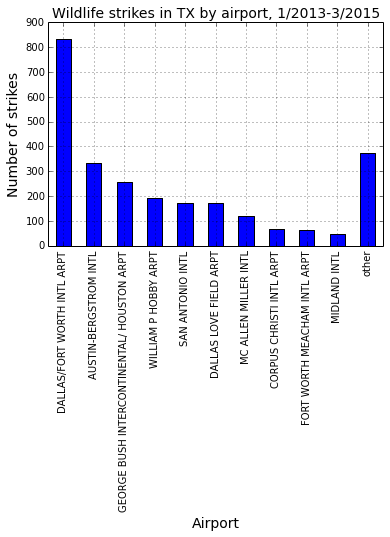

In [5]:
strikes_by_airport = strike_reports_civ["AIRPORT"].value_counts()
airports_with_most_strikes = strikes_by_airport.index[0:10] #find top 10 airports by number of strikes

temp = []
for i in strike_reports_civ["AIRPORT"]:
    if i not in airports_with_most_strikes:
        temp.append('other')
    else:
        temp.append(i)

airports_with_most_strikes = airports_with_most_strikes.append(pd.Series([u'other']))
temp_df = pd.DataFrame(pd.Series(temp).value_counts())
myplot = temp_df.ix[airports_with_most_strikes].plot(kind='bar', fontsize = 10, legend = False)
myplot.set_title("Wildlife strikes in TX by airport, 1/2013-3/2015", fontsize = 14)
myplot.set_xlabel("Airport", fontsize = 14)
myplot.set_ylabel("Number of strikes", fontsize = 14)

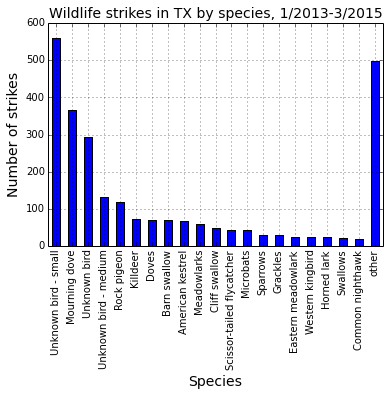

In [6]:
strikes_by_species = strike_reports_civ["SPECIES"].value_counts()
species_with_most_strikes = strikes_by_species.index[0:20] #find top 20 species by number of strikes

temp = []
for i in strike_reports_civ["SPECIES"]:
    if i not in species_with_most_strikes:
        temp.append('other')
    else:
        temp.append(i)

species_with_most_strikes = species_with_most_strikes.append(pd.Series([u'other']))
temp_df = pd.DataFrame(pd.Series(temp).value_counts())
myplot = temp_df.ix[species_with_most_strikes].plot(kind='bar', fontsize = 10, legend = False)
myplot.set_title("Wildlife strikes in TX by species, 1/2013-3/2015", fontsize = 14)
myplot.set_xlabel("Species", fontsize = 14)
myplot.set_ylabel("Number of strikes", fontsize = 14)

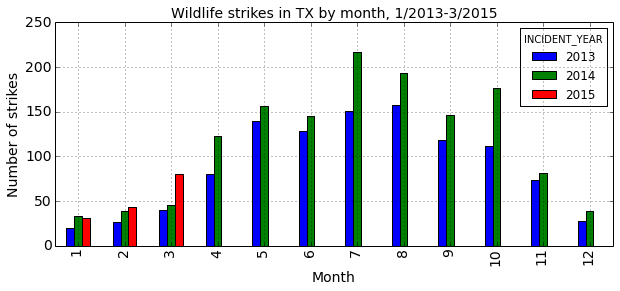

In [7]:
test = strike_reports_civ.copy()
test = test.groupby(['INCIDENT_YEAR', 'INCIDENT_MONTH']).size().reset_index()
test = test.pivot(index='INCIDENT_MONTH', columns='INCIDENT_YEAR', values = 0).reset_index().fillna(0)
myplot = test.plot(kind='bar', x = 'INCIDENT_MONTH', figsize = (10, 4), fontsize = 14)
myplot.set_title("Wildlife strikes in TX by month, 1/2013-3/2015", fontsize = 14)
myplot.set_xlabel("Month", fontsize = 14)
myplot.set_ylabel("Number of strikes", fontsize = 14)

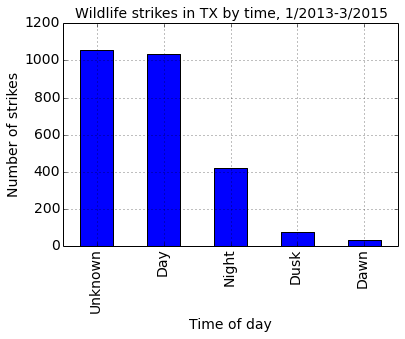

In [8]:
strike_reports_civ["TIME_OF_DAY"].fillna("Unknown", inplace = True)
myplot = strike_reports_civ["TIME_OF_DAY"].value_counts().plot(kind='bar', fontsize = 14)
myplot.set_title("Wildlife strikes in TX by time, 1/2013-3/2015", fontsize = 14)
myplot.set_xlabel("Time of day", fontsize = 14)
myplot.set_ylabel("Number of strikes", fontsize = 14)

##Segmenting data by year (2013 and 2014)

2014    1394
2013    1074
dtype: int64


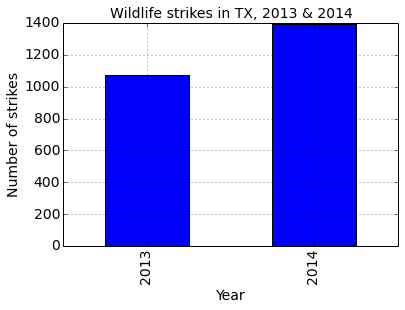

In [9]:
test = strike_reports_civ.copy()
test = test[test.INCIDENT_YEAR.isin([2013, 2014])]
print test["INCIDENT_YEAR"].value_counts()
myplot = test["INCIDENT_YEAR"].value_counts().sort_index().plot(kind='bar', fontsize = 14)
myplot.set_title("Wildlife strikes in TX, 2013 & 2014", fontsize = 14)
myplot.set_xlabel("Year", fontsize = 14)
myplot.set_ylabel("Number of strikes", fontsize = 14)

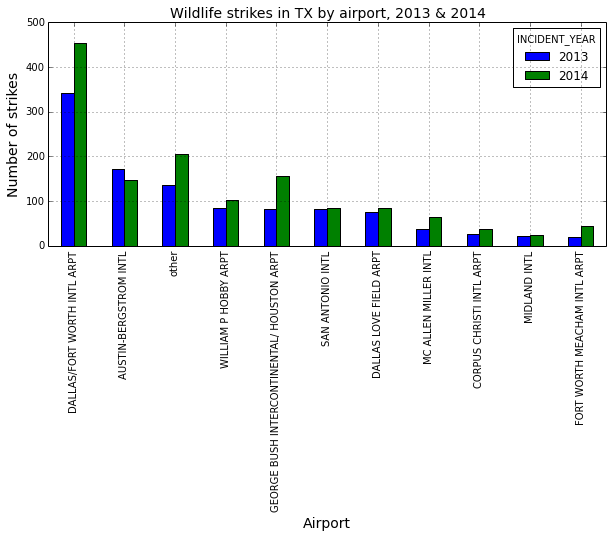

In [10]:
test = strike_reports_civ.copy()
test = test[test.INCIDENT_YEAR.isin([2013, 2014])]
test['AIRPORT'][test.AIRPORT.isin(airports_with_most_strikes) == False] = 'other'
test = test.groupby(['INCIDENT_YEAR', 'AIRPORT']).size().reset_index()
test = test.pivot(index='AIRPORT', columns='INCIDENT_YEAR', values = 0).reset_index().fillna(0)
test.sort(columns = [2013], ascending = False, inplace = True)
myplot = test.plot(kind='bar', x = 'AIRPORT', figsize = (10, 4), fontsize = 10)
myplot.set_title("Wildlife strikes in TX by airport, 2013 & 2014", fontsize = 14)
myplot.set_xlabel("Airport", fontsize = 14)
myplot.set_ylabel("Number of strikes", fontsize = 14)

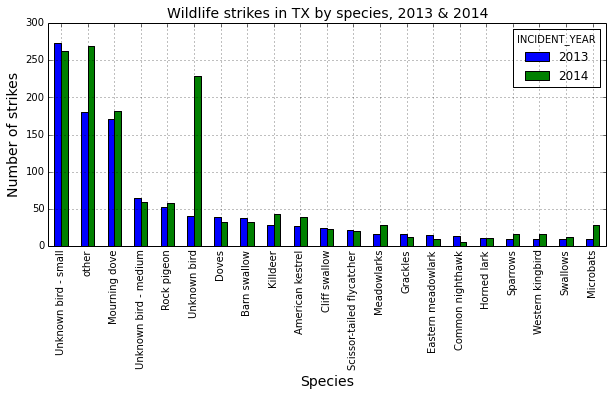

In [11]:
test = strike_reports_civ.copy()
test = test[test.INCIDENT_YEAR.isin([2013, 2014])]
test['SPECIES'][test.SPECIES.isin(species_with_most_strikes) == False] = 'other'
test = test.groupby(['INCIDENT_YEAR', 'SPECIES']).size().reset_index()
test = test.pivot(index='SPECIES', columns='INCIDENT_YEAR', values = 0).reset_index().fillna(0)
test.sort(columns = [2013], ascending = False, inplace = True)
myplot = test.plot(kind='bar', x = 'SPECIES', figsize = (10, 4), fontsize = 10)
myplot.set_title("Wildlife strikes in TX by species, 2013 & 2014", fontsize = 14)
myplot.set_xlabel("Species", fontsize = 14)
myplot.set_ylabel("Number of strikes", fontsize = 14)

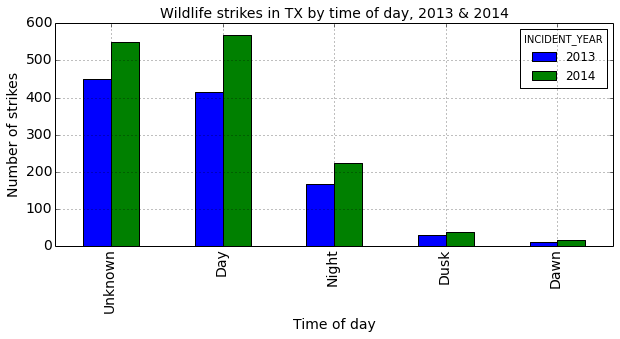

In [12]:
test = strike_reports_civ.copy()
test = test[test.INCIDENT_YEAR.isin([2013, 2014])]
test = test.groupby(['INCIDENT_YEAR', 'TIME_OF_DAY']).size().reset_index()
test = test.pivot(index='TIME_OF_DAY', columns='INCIDENT_YEAR', values = 0).reset_index().fillna(0)
test.sort(columns = [2013], ascending = False, inplace = True)
myplot = test.plot(kind='bar', x = 'TIME_OF_DAY', figsize = (10, 4), fontsize = 14)
myplot.set_title("Wildlife strikes in TX by time of day, 2013 & 2014", fontsize = 14)
myplot.set_xlabel("Time of day", fontsize = 14)
myplot.set_ylabel("Number of strikes", fontsize = 14)

##Exploring other features

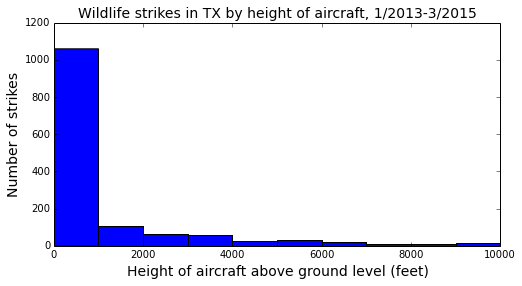

In [13]:
plt.figure(figsize = (8, 4))
plt.hist([strike_reports_civ["HEIGHT"]], bins = 10, range = (0, 10000))
plt.title("Wildlife strikes in TX by height of aircraft, 1/2013-3/2015", fontsize = 14)
plt.xlabel("Height of aircraft above ground level (feet)", fontsize = 14)
plt.ylabel("Number of strikes", fontsize = 14)

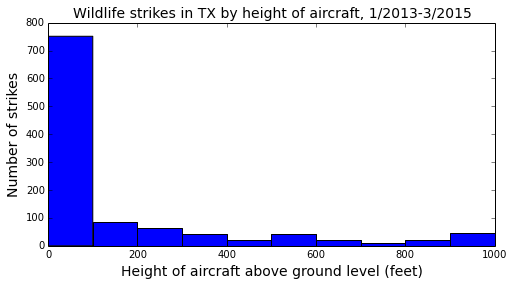

In [14]:
plt.figure(figsize = (8, 4))
plt.hist([strike_reports_civ["HEIGHT"]], bins = 10, range = (0, 1000))
plt.title("Wildlife strikes in TX by height of aircraft, 1/2013-3/2015", fontsize = 14)
plt.xlabel("Height of aircraft above ground level (feet)", fontsize = 14)
plt.ylabel("Number of strikes", fontsize = 14)

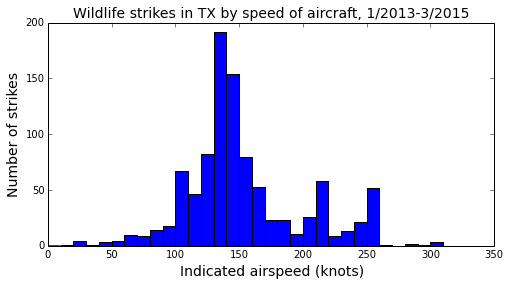

In [15]:
plt.figure(figsize = (8, 4))
plt.hist([strike_reports_civ["SPEED"]], bins = 40, range = (0, 400))
plt.title("Wildlife strikes in TX by speed of aircraft, 1/2013-3/2015", fontsize = 14)
plt.xlabel("Indicated airspeed (knots)", fontsize = 14)
plt.ylabel("Number of strikes", fontsize = 14)

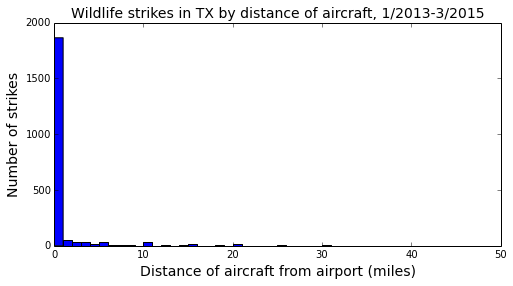

In [16]:
plt.figure(figsize = (8, 4))
plt.hist([strike_reports_civ["DISTANCE"]], bins = 50, range = (0, 50))
plt.title("Wildlife strikes in TX by distance of aircraft, 1/2013-3/2015", fontsize = 14)
plt.xlabel("Distance of aircraft from airport (miles)", fontsize = 14)
plt.ylabel("Number of strikes", fontsize = 14)

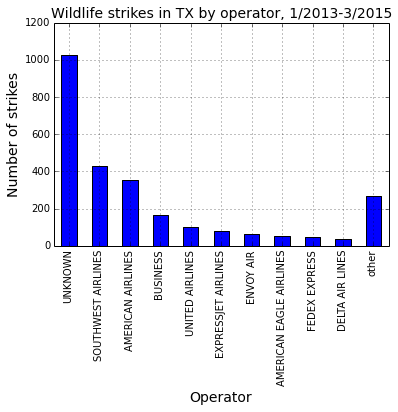

In [17]:
strikes_by_operator = strike_reports_civ["OPERATOR"].value_counts()
operator_with_most_strikes = strikes_by_operator.index[0:10] #find top 10 airports by number of strikes

temp = []
for i in strike_reports_civ["OPERATOR"]:
    if i not in operator_with_most_strikes:
        temp.append('other')
    else:
        temp.append(i)

operator_with_most_strikes = operator_with_most_strikes.append(pd.Series([u'other']))
temp_df = pd.DataFrame(pd.Series(temp).value_counts())
myplot = temp_df.ix[operator_with_most_strikes].plot(kind='bar', fontsize = 10, legend = False)
myplot.set_title("Wildlife strikes in TX by operator, 1/2013-3/2015", fontsize = 14)
myplot.set_xlabel("Operator", fontsize = 14)
myplot.set_ylabel("Number of strikes", fontsize = 14)

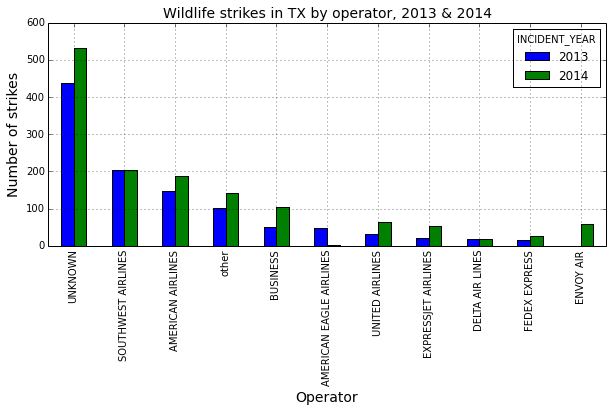

In [18]:
test = strike_reports_civ.copy()
test = test[test.INCIDENT_YEAR.isin([2013, 2014])]
test['OPERATOR'][test.OPERATOR.isin(operator_with_most_strikes) == False] = 'other'
test = test.groupby(['INCIDENT_YEAR', 'OPERATOR']).size().reset_index()
test = test.pivot(index='OPERATOR', columns='INCIDENT_YEAR', values = 0).reset_index().fillna(0)
test.sort(columns = [2013], ascending = False, inplace = True)
myplot = test.plot(kind='bar', x = 'OPERATOR', figsize = (10, 4), fontsize = 10)
myplot.set_title("Wildlife strikes in TX by operator, 2013 & 2014", fontsize = 14)
myplot.set_xlabel("Operator", fontsize = 14)
myplot.set_ylabel("Number of strikes", fontsize = 14)

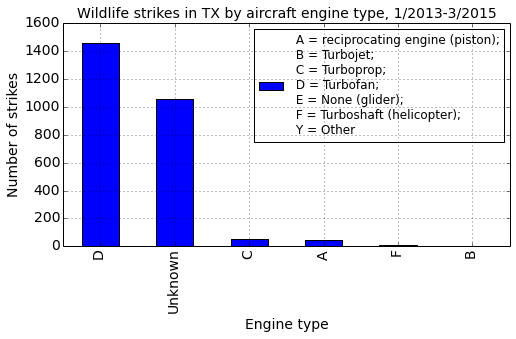

In [19]:
strike_reports_civ["TYPE_ENG"].fillna("Unknown", inplace = True)
myplot = strike_reports_civ["TYPE_ENG"].value_counts().plot(kind='bar', fontsize = 14, figsize = (8, 4))
myplot.set_title("Wildlife strikes in TX by aircraft engine type, 1/2013-3/2015", fontsize = 14)
myplot.set_xlabel("Engine type", fontsize = 14)
myplot.set_ylabel("Number of strikes", fontsize = 14)
myplot.legend([" A = reciprocating engine (piston);\n B = Turbojet;\n C = Turboprop;\n D = Turbofan;\n E = None (glider);\n F = Turboshaft (helicopter);\n Y = Other"])

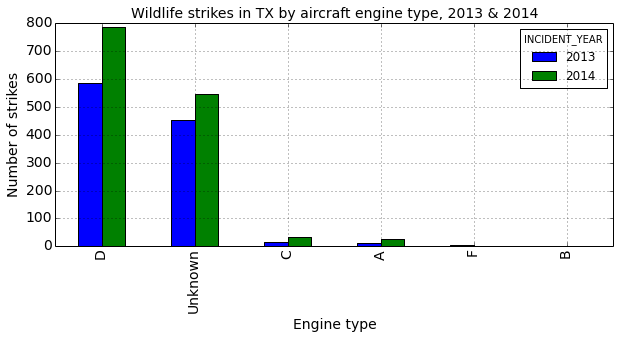

In [20]:
test = strike_reports_civ.copy()
test = test[test.INCIDENT_YEAR.isin([2013, 2014])]
test = test.groupby(['INCIDENT_YEAR', 'TYPE_ENG']).size().reset_index()
test = test.pivot(index='TYPE_ENG', columns='INCIDENT_YEAR', values = 0).reset_index().fillna(0)
test.sort(columns = [2013], ascending = False, inplace = True)
myplot = test.plot(kind='bar', x = 'TYPE_ENG', figsize = (10, 4), fontsize = 14)
myplot.set_title("Wildlife strikes in TX by aircraft engine type, 2013 & 2014", fontsize = 14)
myplot.set_xlabel("Engine type", fontsize = 14)
myplot.set_ylabel("Number of strikes", fontsize = 14)

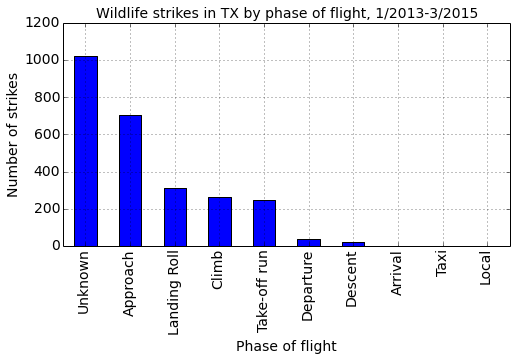

In [21]:
strike_reports_civ["PHASE_OF_FLT"].fillna("Unknown", inplace = True)
myplot = strike_reports_civ["PHASE_OF_FLT"].value_counts().plot(kind='bar', fontsize = 14, figsize = (8, 4))
myplot.set_title("Wildlife strikes in TX by phase of flight, 1/2013-3/2015", fontsize = 14)
myplot.set_xlabel("Phase of flight", fontsize = 14)
myplot.set_ylabel("Number of strikes", fontsize = 14)

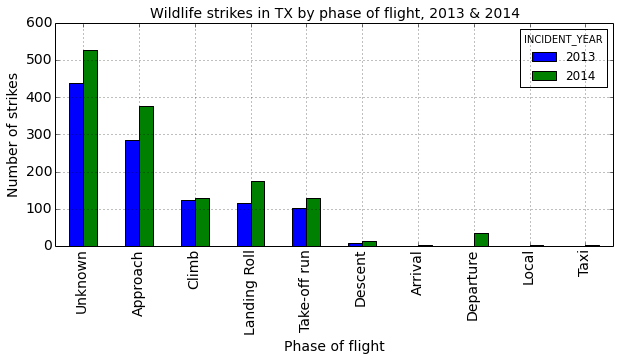

In [22]:
test = strike_reports_civ.copy()
test = test[test.INCIDENT_YEAR.isin([2013, 2014])]
test = test.groupby(['INCIDENT_YEAR', 'PHASE_OF_FLT']).size().reset_index()
test = test.pivot(index='PHASE_OF_FLT', columns='INCIDENT_YEAR', values = 0).reset_index().fillna(0)
test.sort(columns = [2013], ascending = False, inplace = True)
myplot = test.plot(kind='bar', x = 'PHASE_OF_FLT', figsize = (10, 4), fontsize = 14)
myplot.set_title("Wildlife strikes in TX by phase of flight, 2013 & 2014", fontsize = 14)
myplot.set_xlabel("Phase of flight", fontsize = 14)
myplot.set_ylabel("Number of strikes", fontsize = 14)

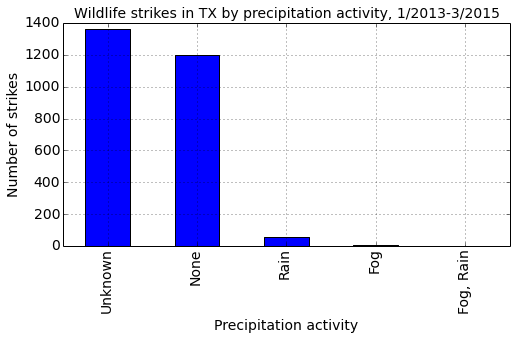

In [23]:
strike_reports_civ["PRECIP"].fillna("Unknown", inplace = True)
myplot = strike_reports_civ["PRECIP"].value_counts().plot(kind='bar', fontsize = 14, figsize = (8, 4))
myplot.set_title("Wildlife strikes in TX by precipitation activity, 1/2013-3/2015", fontsize = 14)
myplot.set_xlabel("Precipitation activity", fontsize = 14)
myplot.set_ylabel("Number of strikes", fontsize = 14)

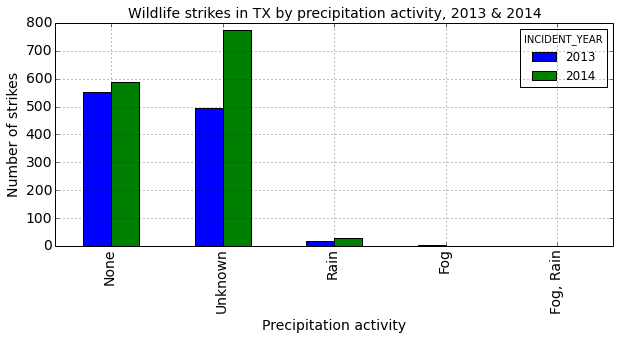

In [24]:
test = strike_reports_civ.copy()
test = test[test.INCIDENT_YEAR.isin([2013, 2014])]
test = test.groupby(['INCIDENT_YEAR', 'PRECIP']).size().reset_index()
test = test.pivot(index='PRECIP', columns='INCIDENT_YEAR', values = 0).reset_index().fillna(0)
test.sort(columns = [2013], ascending = False, inplace = True)
myplot = test.plot(kind='bar', x = 'PRECIP', figsize = (10, 4), fontsize = 14)
myplot.set_title("Wildlife strikes in TX by precipitation activity, 2013 & 2014", fontsize = 14)
myplot.set_xlabel("Precipitation activity", fontsize = 14)
myplot.set_ylabel("Number of strikes", fontsize = 14)

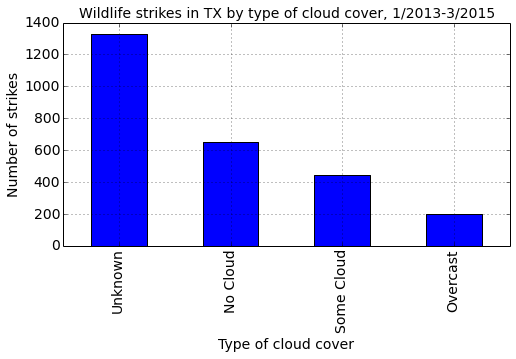

In [25]:
strike_reports_civ["SKY"].fillna("Unknown", inplace = True)
myplot = strike_reports_civ["SKY"].value_counts().plot(kind='bar', fontsize = 14, figsize = (8, 4))
myplot.set_title("Wildlife strikes in TX by type of cloud cover, 1/2013-3/2015", fontsize = 14)
myplot.set_xlabel("Type of cloud cover", fontsize = 14)
myplot.set_ylabel("Number of strikes", fontsize = 14)

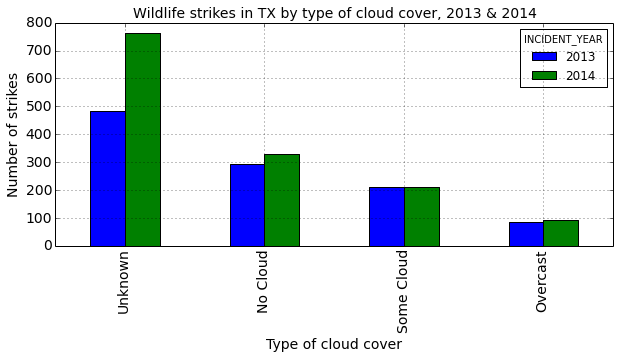

In [26]:
test = strike_reports_civ.copy()
test = test[test.INCIDENT_YEAR.isin([2013, 2014])]
test = test.groupby(['INCIDENT_YEAR', 'SKY']).size().reset_index()
test = test.pivot(index='SKY', columns='INCIDENT_YEAR', values = 0).reset_index().fillna(0)
test.sort(columns = [2013], ascending = False, inplace = True)
myplot = test.plot(kind='bar', x = 'SKY', figsize = (10, 4), fontsize = 14)
myplot.set_title("Wildlife strikes in TX by type of cloud cover, 2013 & 2014", fontsize = 14)
myplot.set_xlabel("Type of cloud cover", fontsize = 14)
myplot.set_ylabel("Number of strikes", fontsize = 14)

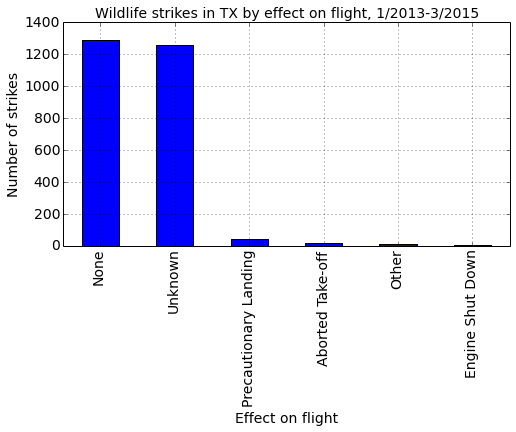

In [27]:
strike_reports_civ["EFFECT"].fillna("Unknown", inplace = True)
myplot = strike_reports_civ["EFFECT"].value_counts().plot(kind='bar', fontsize = 14, figsize = (8, 4))
myplot.set_title("Wildlife strikes in TX by effect on flight, 1/2013-3/2015", fontsize = 14)
myplot.set_xlabel("Effect on flight", fontsize = 14)
myplot.set_ylabel("Number of strikes", fontsize = 14)

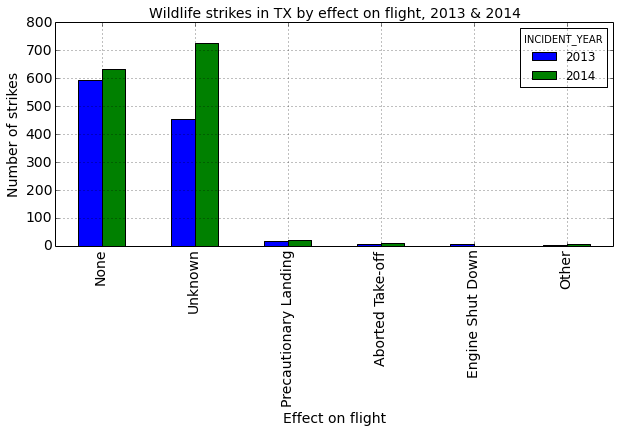

In [28]:
test = strike_reports_civ.copy()
test = test[test.INCIDENT_YEAR.isin([2013, 2014])]
test = test.groupby(['INCIDENT_YEAR', 'EFFECT']).size().reset_index()
test = test.pivot(index='EFFECT', columns='INCIDENT_YEAR', values = 0).reset_index().fillna(0)
test.sort(columns = [2013], ascending = False, inplace = True)
myplot = test.plot(kind='bar', x = 'EFFECT', figsize = (10, 4), fontsize = 14)
myplot.set_title("Wildlife strikes in TX by effect on flight, 2013 & 2014", fontsize = 14)
myplot.set_xlabel("Effect on flight", fontsize = 14)
myplot.set_ylabel("Number of strikes", fontsize = 14)

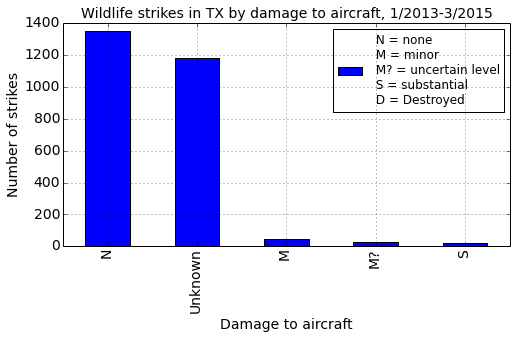

In [29]:
strike_reports_civ["DAMAGE"].fillna("Unknown", inplace = True)
myplot = strike_reports_civ["DAMAGE"].value_counts().plot(kind='bar', fontsize = 14, figsize = (8, 4))
myplot.set_title("Wildlife strikes in TX by damage to aircraft, 1/2013-3/2015", fontsize = 14)
myplot.set_xlabel("Damage to aircraft", fontsize = 14)
myplot.set_ylabel("Number of strikes", fontsize = 14)
myplot.legend([" N = none\n M = minor\n M? = uncertain level\n S = substantial\n D = Destroyed"])

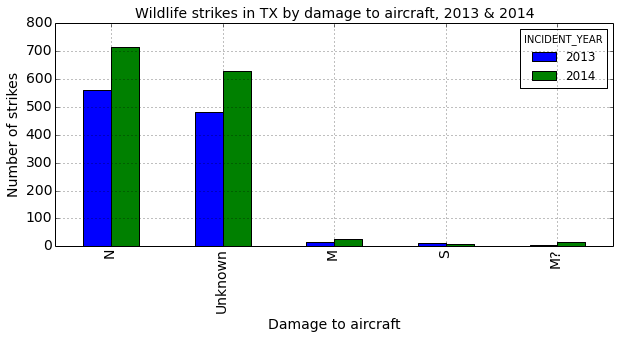

In [30]:
test = strike_reports_civ.copy()
test = test[test.INCIDENT_YEAR.isin([2013, 2014])]
test = test.groupby(['INCIDENT_YEAR', 'DAMAGE']).size().reset_index()
test = test.pivot(index='DAMAGE', columns='INCIDENT_YEAR', values = 0).reset_index().fillna(0)
test.sort(columns = [2013], ascending = False, inplace = True)
myplot = test.plot(kind='bar', x = 'DAMAGE', figsize = (10, 4), fontsize = 14)
myplot.set_title("Wildlife strikes in TX by damage to aircraft, 2013 & 2014", fontsize = 14)
myplot.set_xlabel("Damage to aircraft", fontsize = 14)
myplot.set_ylabel("Number of strikes", fontsize = 14)